In [56]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Afficher/cacher le code"></form>''')


# La perception de la recherche médicale en France


## 1. Introduction : l'extension de la perception de santé à la recherche

La littératie en santé se concentre sur les pratiques de santé et de prévention. Cependant, les thématiques liées à la recherche médicale et à l'innovation thérapeutique sont très souvent discutées en lien avec le soin et ses évolutions sociales (Briggs et Hallin, 2016). Les questions associées à la recherche médicale relèvent, au moins en partie, de l'expérience du système de santé moderne.

Tout d'abord, les promesses issues de la recherche médicale et technologique font souvent la une des journaux et se trouvent discutées dans l'espace public (Hallin et al., 2013) : nouveaux traitement envisagés pour la maladie d’Alzheimer (Dalgalarrondo et Hauray, 2020), possibilités ouvertes par les développements en intelligence artificielle (Mignot et Schultz, 2022) ou encore arrivée de stratégies de prévention innovantes comme la PREP (prophylaxie pré-exposition) pour le VIH-sida (Carillon et Girard, 2019). La connaissance du fonctionnement de la recherche permet de formuler des attentes réalistes sur les avancées scientifiques et technologiques en santé. Elle est aussi susceptible de participer directement à nourrir la confiance, ou la défiance, envers les mesures de santé publique.

Par ailleurs, la question de la preuve médicale trouve aussi une place dans la discussion publique et politique, avec des effets sur les perceptions des individus, et plus généralement l'autorité culturelle de la médecine elle-même (Epstein et Timmermans, 2021). De nombreux sujets, notamment lors des procès autour des affaires médicales, font directement intervenir des discussions sur l'organisation des essais cliniques ou des niveaux de preuve (Gaudillère, 2020). Cette preuve médicale trouve aussi sa place dans les débats sur l'autorisation de nouveaux traitements ou au contraire la critique de certaines pratiques existantes, par exemple le rapport cout/efficacité de certains médicaments (Wieseler et al., 2019).

Sur un autre volet, la recherche clinique a connu des développements importants avec une place croissante prise par les politiques d'accès à l'innovation en santé notamment dans le domaine du cancer (Besle et Schultz, 2020). La part croissante d'usagers qui intègrent des essais cliniques rencontre aussi la difficulté d'organiser ce recrutement pour la conduite de la recherche clinique, ce qui est perçu comme un frein potentiel à l'innovation. La connaissance de la recherche clinique a aussi des implications sur l'autonomie de décisions des patients (Mancini et al., 2018), et la littératie en santé est susceptible d'avoir des conséquences sur la participation des patients aux essais (Ousseine et al., 2022). La difficulté de recruter des patients dans les essais initiés au début de l'épidémie de COVID-19 est un bon exemple des enjeux publics autour de la recherche clinique (Raulin, 2020).

Enfin, l'épidémie de COVID-19 a été une étape supplémentaire dans la diffusion des informations sur la conduite de la recherche en santé. Que ce soit autour des potentiels traitements ou de la conduite des politiques de vaccination, la question des données probantes en santé publique ou de la conduite des essais cliniques a occupé une place importante (Schultz et al., 2021 ; Schultz et Ward, 2022). La défiance envers les processus de preuve médicale occupe une place directe dans les comportements de santé notamment concernant la vaccination. Le degré de connaissance du déroulement de la recherche médicale est susceptible d'être associé aux critiques portées sur les mesures de santé publique.

Tout en restant clairement délimité des enjeux centraux de la santé et de l'organisation de soin, il semble important de poser la question de la perception dans la population française de la recherche médicale, et de son lien avec la littératie en santé. Ce chapitre procède en deux étapes : tout d'abord, il propose de dresser un descriptif de la perception de la recherche médicale et de la recherche clinique en France, puis il pose la question de la place des facteurs associés à la littératie en santé dans cette perception.

## 2. Méthodologie


Les deux vagues de l'enquête $HLS_{19}$ en France ont intégré des questions originales sur la recherche médicale et la recherche clinique. Les mêmes questions ont été posées entre les deux vagues, exceptées pour deux qui ont été modifiées. Ces données originales produites pendant une période critique (celle de l'épidémie de COVID-19) permettent d'apporter un premier éclairage général sur la perception de la recherche médicale en France, et de poser la question de la relation avec la littératie en santé. Une partie des résultats a donné lieu à des publications médicales dédiées (Schultz et al., 2021 ; Schultz et al., 2022).

Les questions posées portaient sur deux grandes thématiques : d'une part les essais cliniques ; de l'autre la conduite de la recherche médicale. Le détail des questions est en annexe.

L'analyse des réponses est faite à la lumière des variables indépendantes suivantes :

- Score de littératie HLS12
- Variables socio-déo : âge, sexe, dip
- Score de défavorisation fd
- Variable rapport à la santé : état santé, profession santé, recherche information en santé (HI1)
- Perception de la société : confiance dans différents acteurs, notamment les médecins

In [14]:
# Chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyshs
import regex as re
def que_pourcentages(x):
    t = re.findall("\((.*?)%\)",x)
    if len(t)>0:
        return t[0]
    return None

# Chargement des données 
data = pd.read_excel("bdd2.xlsx")
data["ID"] = data.apply(lambda x : "%s-%s"%(x["Vague"],x["Respondent.Serial"]),axis=1)

# Données supplémentaires
ajout = pd.read_excel("04.2022.Base-HLS19-Colonnes-sup.xlsx")
ajout["ID"] = ajout.apply(lambda x : "%s-%s"%(x["Vague"],x["RespondentSerial"]),axis=1)
ajout = ajout.set_index("ID")

# Joindre les données
data = data.join(ajout,on="ID",rsuffix="ADD")

def reco(x):
    if x<4:
        return "1 - Moins que le bac."
    if x == 4:
        return "2 - Baccalauréat"
    else:
        return "3 - Au-dessus que le bac."
data["dip"] = data["DET6"].apply(reco)

data["zones"] = data["FRINSEEMKTSIZE"].replace({1:"1 - Rurale",
                                                2:"2 - Urbaine <20k",
                                                3:"3 - Urbaine <100k",
                                                4:"4 - Urbaine >100k",
                                                5:"5 - Paris"})
data["sexe"] = data["resp_gender"].replace({"female":"1 - Femme","male":"2 - Homme"})
data["age"] = pd.cut(data["resp_age"],[0,25,45,65,100],labels = ["[0-25[","[25-45[","[45-65[","[65+"])
data["age2"] = pd.cut(data["resp_age"],[0,35,45,55,65,100],
                labels = ["[18-35[","[35-45[","[45-55[","[55-65[","[65-75]"])
data["defavorise"] = data["fd"].replace({"DF":"2 - Oui","Pas de DF":"1 - Non"})

data["rechercheinfo"] = data["HI1"].replace({1:"2 - Oui",2:"1 - Non"})
data["formationsante"] = data["DET8"].replace({1:"2 - Oui",2:"1 - Non"})
data["etatsante"] = data["HSTAT1"].replace({1:"1 - Bon",2:"1 - Bon",3:"2 - Moyen",4:"3 - Mauvais",5:"3 - Mauvais"})


data["rev"] = data["D16"].replace({1:"1 - less than 1000",2:"1 - less than 1000",3:"1 - less than 1000",
                     4:"2 - 1000 to 2000",5:"2 - 1000 to 2000",6:"2 - 1000 to 2000",
                     7:"3 - 2000 to 3000",8:"3 - 2000 to 3000",9:"4 - 3000 to 5000",
                     10:"5 - 5000 and more",11:"5 - 5000 and more",12:"6 - NSPR"
                    })
reco = {'Problématique':"3 - Problématique", 
        'Excellent':"1 - Excellente", 'suffisant':"2 - Suffisante", 'Inadéquat':"4 - Inadéquate"}
data["HLQ12"] = data["HLQ12"].replace(reco)

# Confiance
data["confiance"] = data[["CONF_%d._scale"%i for i in range(1,6)]].replace({1:1,2:1,3:0,4:0}).sum(axis=1)/5

reco = {1:"1 - Oui",2:"1 - Oui",3:"2 - Non",4:"2 - Non"}
reco = {1:"1 - Très confiance",2:"2 - Plutôt confiance",3:"3 - Plutôt pas confiance",4 : "4 - Pas du tout confiance"}
data["confIndLabo"] = data['CONF_6._scale'].replace(reco)
data["confMedecins"] = data['CONF_4._scale'].replace(reco)
data["confScientifiques"] = data['CONF_3._scale'].replace(reco)
data["confPolitiques"] = data['CONF_2._scale'].replace(reco)
data["confJournalistes"] = data['CONF_1._scale'].replace(reco)

reco = {1:"1 - Oui",2:"1 - Oui",3:"2 - Non",4:"2 - Non"}
data["confMedecins2"] = data['CONF_4._scale'].replace(reco)
data["confScientifiques2"] = data['CONF_3._scale'].replace(reco)



# Connaissance des EC

reco = {1 : "1 - Jamais entendu parler",
        2 : "2 - Connaissance seulement du mot",
        3 : "3 - Faible familiarité",
        4 : "4 - Bonne familiarité",
        5 : "5 - Très bonne familiarité"}
data["ConnaissanceEC"] = data["EC0"].replace(reco)
data["avisEC"] = data["EC2__1._scale"]
data["avisEC_C"] = pd.qcut(data["EC2__1._scale"],[0,0.33,0.66,1],["Q1","Q2","Q3"])
data["FavorableEC"] = data["avisEC"].apply(lambda x : 1 if x >=6 else 0) 
data["ConnaissanceBien"] = data["ConnaissanceEC"].apply(lambda x : 1 if x 
            in ["4 - Bonne familiarité","5 - Très bonne familiarité"] else 0)
data["familiarityCT"] = data["ConnaissanceBien"].replace({0:"1 - Non",1:"2 - Oui"})
data["Phase"] = data["EC3"].replace({1:"1 - Oui",2:"2 - Non"}).fillna("NA")

# Echelle sur la recherche médicale
reco1 = {1:"1 - D'accord", 2:"2 - Plutôt d'accord",
        3:"3 -Plutôt pas d'accord",4:"4 - Pas d'accord"}
reco2 = {1:"1 - D'accord", 2:"1 - D'accord",
        3:"2 - Pas d'accord",4:"2 - Pas d'accord"}
data["RM_cancer"] = data["RM_1._scale"].replace(reco2)
data["RM_covid"] = data["RM_2._scale"].replace(reco2)
data["RM_industriels"] = data["RM_3._scale"].replace(reco2)
data["RM_medecins"] = data["RM_4._scale"].replace(reco2)
data["RM_chomage"] = data["RM_5._scale"].replace(reco2)
data["RM_medicaments"] = data["RM_6._scale"].replace(reco2)
data["RM_choix_citoyens"] = data["RM_7._scale"].replace(reco2)
data["RM_nouvelles_maladies"] = data["RM_8._scale"].replace(reco2)
data["RM_responsabilite_etat"] = data["RM_9._scale"].replace(reco2)

vague1 = data["Vague"]==1
vague2 = data["Vague"]==2

## 3. Résultats

Dans un premier temps, nous identifions quelques caractéristiques de la perception de la recherche médicale en France. Ensuite, nous nous concentrons sur un aspect visible et largement discuté dans la presse : les essais cliniques.

### 3.1 Perception générale de la recherche médicale

La recherche médicale s'inscrit dans un double ensemble de références : celles de la médecine, avec la figure du médecin et les progrès des traitements au cours du XXe siècle, et celle de la science, qui dépasse les enjeux de la santé.

La confiance dans les scientifiques et les médecins est très forte en France (figure 1), respectivement 88% et 92%, contrairement à la confiance dans les acteurs politiques (16%) et les journalistes (26%). Alors que la préoccupation concernant le chômage fait partie des principales préoccupations des français, seulement un quart des répondants (26%) considèrent qu'il est plus important de lutter contre le chômage que de financer la recherche médicale.

In [2]:
pd.concat({"Confiance médecins": pyshs.tri_a_plat(data,"confMedecins","weight"),
           "scientifiques":pyshs.tri_a_plat(data,"confScientifiques","weight"),
           "journalistes":pyshs.tri_a_plat(data,"confJournalistes","weight"),
           "politiques":pyshs.tri_a_plat(data,"confPolitiques","weight"),
          },axis=1)

Confiance médecins                  \
                           Effectif redressé Pourcentage (%)   
1 - Très confiance                     524.4            26.2   
2 - Plutôt confiance                  1330.2            66.4   
3 - Plutôt pas confiance               125.4             6.3   
4 - Pas du tout confiance               22.9             1.1   
Total                                 2002.9           100.0   

                              scientifiques                      journalistes  \
                          Effectif redressé Pourcentage (%) Effectif redressé   
1 - Très confiance                    427.9            21.4              46.3   
2 - Plutôt confiance                 1338.9            66.8             480.6   
3 - Plutôt pas confiance              192.6             9.6             910.4   
4 - Pas du tout confiance              43.6             2.2             565.7   
Total                                2003.0           100.0            2003.0   

                                                 politiques                  
                          Pourcentage (%) Effectif redressé Pourcentage (%)  
1 - Très confiance                    2.3              51.2             2.6  
2 - Plutôt confiance                 24.0             279.3            13.9  
3 - Plutôt pas confiance             45.5             755.3            37.7  
4 - Pas du tout confiance            28.2             917.2            45.8  
Total                               100.0            2003.0           100.0

1 - Très confiance            2.3
2 - Plutôt confiance         24.0
3 - Plutôt pas confiance     45.5
4 - Pas du tout confiance    28.2
Name: Pourcentage (%), dtype: float64
1 - Très confiance            2.6
2 - Plutôt confiance         13.9
3 - Plutôt pas confiance     37.7
4 - Pas du tout confiance    45.8
Name: Pourcentage (%), dtype: float64
1 - Très confiance           21.4
2 - Plutôt confiance         66.8
3 - Plutôt pas confiance      9.6
4 - Pas du tout confiance     2.2
Name: Pourcentage (%), dtype: float64
1 - Très confiance           26.2
2 - Plutôt confiance         66.4
3 - Plutôt pas confiance      6.3
4 - Pas du tout confiance     1.1
Name: Pourcentage (%), dtype: float64


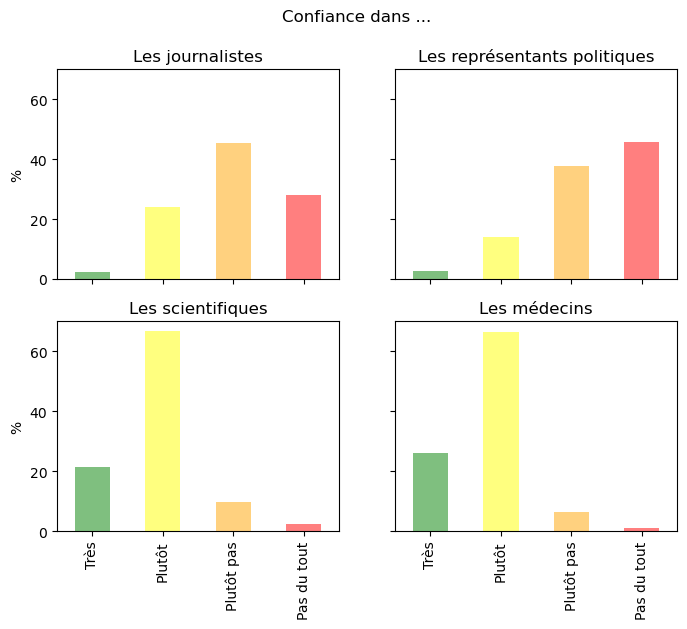

In [3]:
s = ["confJournalistes","confPolitiques","confScientifiques","confMedecins"]
fig,ax = plt.subplots(2,2,figsize=(8,6),sharex=True,sharey=True)
ax = ax.flatten()
title = ["Les journalistes","Les représentants politiques","Les scientifiques","Les médecins"]
for i in range(0,len(s)):
    t = pyshs.tri_a_plat(data,s[i],"weight")["Pourcentage (%)"].drop("Total").sort_index()
    print(t)
    t.index = ["Très","Plutôt","Plutôt pas","Pas du tout"]
    t.plot(kind="bar",ax=ax[i],color=["green","yellow","orange","red"],alpha=0.5)
    ax[i].set_title(title[i])
plt.suptitle("Confiance dans ...")
ax[0].set_ylabel("%")
ax[2].set_ylabel("%")
plt.savefig("fig1.png",bbox_inches ="tight")
plt.show() 

Par ailleurs, près d'un répondant sur deux a une conception "indifférenciationniste" de la recherche médicale, en répondant oui sur le fait que la recherche d'une pathologie particulière (COVID ou cancer) se fait de la même manière que les autres pathologies (Tableau annexe 1).

In [4]:
print("Tableau - annexe")
tab_a1 = pd.concat({"Recherche cancer spécifique":pyshs.tri_a_plat(data,"RM_cancer","weight")["Pourcentage (%)"],
          "Recherche covid spécifique":pyshs.tri_a_plat(data,"RM_covid","weight")["Pourcentage (%)"]},axis=1)
tab_a1

Tableau - annexe


,Recherche cancer spécifique,Recherche covid spécifique
1 - D'accord,60.3,43.4
2 - Pas d'accord,39.7,56.6
Total,100.0,100.0


La recherche médicale est perçue comme un domaine impliquant une diversité d'acteurs (tableau 1), avec seulement un tiers (29.3%) des répondants considérant qu'elle est le fait uniquement des médecins, et 86% considèrent que la collaboration avec des industriels est normale pour développer un nouveau médicament. Cependant les répondants sont davantage clivés sur la place de ces industriels, avec les deux tiers qui considèrent qu'ils doivent avoir un rôle important dans la recherche médicale (68%) mais seulement la moitié qui considèrent qu'on doit leur donner la responsabilité de développer les nouveaux médicaments (43%).

In [5]:
print("Tableau")
tab1 = pd.concat({"La recherche médicale est réalisée uniquement par des médecins":pyshs.tri_a_plat(data[vague1],"RM_medecins","weight")["Pourcentage (%)"],
           "Il est normal que les industriels collaborent avec les médecins pour développer un nouveau médicament":pyshs.tri_a_plat(data[vague2],"RM_medecins","weight")["Pourcentage (%)"],
           "Les industriels doivent avoir un rôle important dans la recherche médicale":pyshs.tri_a_plat(data[vague1],"RM_industriels","weight")["Pourcentage (%)"],
           "Il faut laisser aux industriels la responsabilité de développer les nouveaux médicaments":pyshs.tri_a_plat(data[vague2],"RM_industriels","weight")["Pourcentage (%)"]
          },axis=1)

tab1

Tableau


,La recherche médicale est réalisée uniquement par des médecins,Il est normal que les industriels collaborent avec les médecins pour développer un nouveau médicament,Les industriels doivent avoir un rôle important dans la recherche médicale,Il faut laisser aux industriels la responsabilité de développer les nouveaux médicaments
1 - D'accord,29.3,86.2,68.3,43.2
2 - Pas d'accord,70.7,13.8,31.7,56.8
Total,100.0,100.0,100.0,100.0


In [6]:
pyshs.tableau_croise_multiple(data,"confJournalistes",["HLQ12"],"weight")

1 - Très confiance 2 - Plutôt confiance  \
Variable          Modalités                                                   
HLQ12 (p = 0.000) 1 - Excellente           28.6 (8.7%)         93.9 (28.7%)   
                  2 - Suffisante            9.8 (1.2%)        210.2 (26.5%)   
                  3 - Problématique         6.1 (1.0%)        134.0 (22.5%)   
                  4 - Inadéquate            1.9 (0.7%)         42.5 (14.9%)   
                  Total                    46.3 (2.3%)        480.6 (24.0%)   

                                    3 - Plutôt pas confiance  \
Variable          Modalités                                    
HLQ12 (p = 0.000) 1 - Excellente               124.1 (38.0%)   
                  2 - Suffisante               392.9 (49.5%)   
                  3 - Problématique            266.4 (44.6%)   
                  4 - Inadéquate               127.0 (44.4%)   
                  Total                        910.4 (45.5%)   

                                    4 - Pas du tout confiance          Total  \
Variable          Modalités                                                    
HLQ12 (p = 0.000) 1 - Excellente                 80.4 (24.6%)   326.9 (100%)   
                  2 - Suffisante                180.7 (22.8%)   793.7 (100%)   
                  3 - Problématique             190.2 (31.9%)   596.6 (100%)   
                  4 - Inadéquate                114.4 (40.0%)   285.8 (100%)   
                  Total                         565.7 (28.2%)  2003.0 (100%)   

                                    Distribution  
Variable          Modalités                       
HLQ12 (p = 0.000) 1 - Excellente           16.3%  
                  2 - Suffisante           39.6%  
                  3 - Problématique        29.8%  
                  4 - Inadéquate           14.3%  
                  Total                   100.0%

In [7]:
pyshs.tableau_croise_multiple(data[vague2],"RM_medecins",["HLQ12"],"weight")

1 - D'accord 2 - Pas d'accord  \
Variable          Modalités                                           
HLQ12 (p = 0.001) 1 - Excellente     145.5 (90.7%)      15.0 (9.3%)   
                  2 - Suffisante     324.2 (90.2%)      35.3 (9.8%)   
                  3 - Problématique  265.1 (81.2%)     61.3 (18.8%)   
                  4 - Inadéquate     127.5 (83.0%)     26.2 (17.0%)   
                  Total              862.2 (86.2%)    137.8 (13.8%)   

                                             Total Distribution  
Variable          Modalités                                      
HLQ12 (p = 0.001) 1 - Excellente      160.5 (100%)        16.0%  
                  2 - Suffisante      359.4 (100%)        35.9%  
                  3 - Problématique   326.5 (100%)        32.6%  
                  4 - Inadéquate      153.6 (100%)        15.4%  
                  Total              1000.0 (100%)        99.9%

In [8]:
pyshs.tableau_croise_multiple(data[vague2],"RM_industriels",["HLQ12"],"weight")

1 - D'accord 2 - Pas d'accord  \
Variable          Modalités                                           
HLQ12 (p = 0.000) 1 - Excellente      84.7 (52.8%)     75.8 (47.2%)   
                  2 - Suffisante     181.7 (50.6%)    177.7 (49.4%)   
                  3 - Problématique  111.6 (34.2%)    214.8 (65.8%)   
                  4 - Inadéquate      54.4 (35.4%)     99.2 (64.6%)   
                  Total              432.5 (43.2%)    567.5 (56.8%)   

                                             Total Distribution  
Variable          Modalités                                      
HLQ12 (p = 0.000) 1 - Excellente      160.5 (100%)        16.0%  
                  2 - Suffisante      359.4 (100%)        35.9%  
                  3 - Problématique   326.5 (100%)        32.6%  
                  4 - Inadéquate      153.6 (100%)        15.4%  
                  Total              1000.0 (100%)        99.9%

### 3.2 Les français et la recherche clinique

La recherche clinique fait partie des sujets très visibles publiquement concernant la recherche médicale. En effet, concernant l'expérimentation en milieu hospitalier de stratégies thérapeutiques, elle se rapproche largement du soin. Pendant l'épidémie de COVID-19, la couverture des avancées de la recherche clinique sur les différentes stratégies thérapeutiques explorées a été massive. Il est donc intéressant d'avoir un tableau des connaissances concernant la recherche clinique.

Seulement 3% des français n'ont jamais entendu parler d'essais cliniques (figure 2), et un français sur 5 (19.7%) disent avoir une bonne ou une très bonne connaissance de ce qu'est un essai clinique. Plus encore, plus d'un français sur deux (53.9%) disent savoir que les essais sont distiguées en différentes phases.



Graphique - possibilité d'en faire un tableau
m : 6.56 std : 1.74
1 - Jamais entendu parler             3.0
2 - Connaissance seulement du mot    33.9
3 - Faible familiarité               43.4
4 - Bonne familiarité                14.6
5 - Très bonne familiarité            5.1
Name: Pourcentage (%), dtype: float64


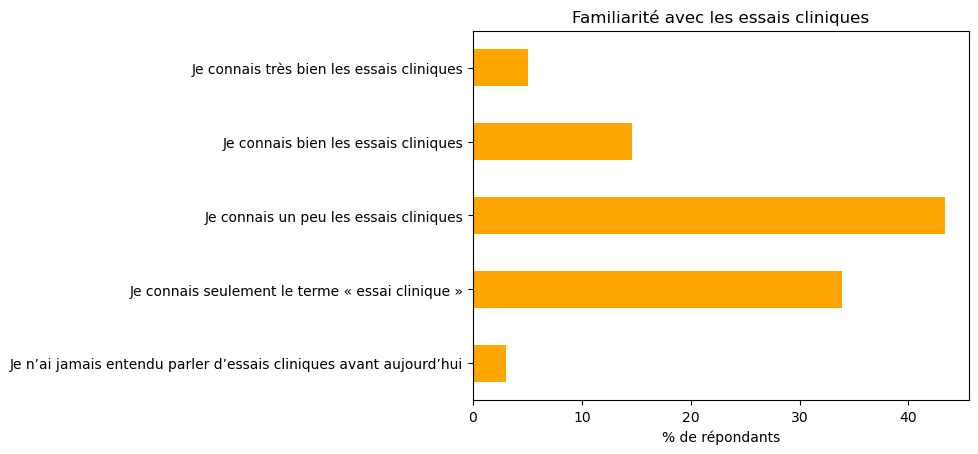

In [9]:
print("Graphique - possibilité d'en faire un tableau")
print("m :",round(data["avisEC"].mean(),2),"std :",round(data["avisEC"].std(),2))
t = pyshs.tri_a_plat(data,"ConnaissanceEC","weight")["Pourcentage (%)"].drop("Total")
print(t)
t.index = ["Je n’ai jamais entendu parler d’essais cliniques avant aujourd’hui",
"Je connais seulement le terme « essai clinique »",
"Je connais un peu les essais cliniques",
"Je connais bien les essais cliniques",
"Je connais très bien les essais cliniques"]
t.plot(kind="barh",color="orange")
plt.xlabel("% de répondants")
plt.title("Familiarité avec les essais cliniques")
plt.savefig("fig2.png",bbox_inches ="tight")
plt.show()

In [10]:
pyshs.tableau_croise_multiple(data,"ConnaissanceEC",["HLQ12"],"weight")

1 - Jamais entendu parler  \
Variable          Modalités                                     
HLQ12 (p = 0.000) 1 - Excellente                  15.1 (4.6%)   
                  2 - Suffisante                  27.7 (3.5%)   
                  3 - Problématique               11.9 (2.0%)   
                  4 - Inadéquate                   6.1 (2.1%)   
                  Total                           60.8 (3.0%)   

                                    2 - Connaissance seulement du mot  \
Variable          Modalités                                             
HLQ12 (p = 0.000) 1 - Excellente                         61.0 (18.7%)   
                  2 - Suffisante                        275.7 (34.7%)   
                  3 - Problématique                     230.1 (38.6%)   
                  4 - Inadéquate                        111.4 (39.0%)   
                  Total                                 678.2 (33.9%)   

                                    3 - Faible familiarité  \
Variable          Modalités                                  
HLQ12 (p = 0.000) 1 - Excellente             134.0 (41.0%)   
                  2 - Suffisante             340.6 (42.9%)   
                  3 - Problématique          257.8 (43.2%)   
                  4 - Inadéquate             136.9 (47.9%)   
                  Total                      869.3 (43.4%)   

                                    4 - Bonne familiarité  \
Variable          Modalités                                 
HLQ12 (p = 0.000) 1 - Excellente             74.8 (22.9%)   
                  2 - Suffisante            117.2 (14.8%)   
                  3 - Problématique          75.5 (12.7%)   
                  4 - Inadéquate              24.3 (8.5%)   
                  Total                     291.8 (14.6%)   

                                    5 - Très bonne familiarité          Total  \
Variable          Modalités                                                     
HLQ12 (p = 0.000) 1 - Excellente                  42.0 (12.8%)   326.9 (100%)   
                  2 - Suffisante                   32.4 (4.1%)   793.7 (100%)   
                  3 - Problématique                21.3 (3.6%)   596.6 (100%)   
                  4 - Inadéquate                    7.1 (2.5%)   285.8 (100%)   
                  Total                           102.9 (5.1%)  2003.0 (100%)   

                                    Distribution  
Variable          Modalités                       
HLQ12 (p = 0.000) 1 - Excellente           16.3%  
                  2 - Suffisante           39.6%  
                  3 - Problématique        29.8%  
                  4 - Inadéquate           14.3%  
                  Total                   100.0%

In [11]:
pip install pingouin


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pingouin

In [13]:
pingouin.anova(data,"avisEC","HLQ12")

,Source,ddof1,ddof2,F,p-unc,np2
0,HLQ12,3,1939,22.655069,2.047983e-14,0.033865


In [14]:
data.groupby("HLQ12")["avisEC"].mean()

HLQ12
1 - Excellente       7.154839
2 - Suffisante       6.602347
3 - Problématique    6.456410
4 - Inadéquate       6.021352
Name: avisEC, dtype: float64

In [15]:
t

Je n’ai jamais entendu parler d’essais cliniques avant aujourd’hui     3.0
Je connais seulement le terme « essai clinique »                      33.9
Je connais un peu les essais cliniques                                43.4
Je connais bien les essais cliniques                                  14.6
Je connais très bien les essais cliniques                              5.1
Name: Pourcentage (%), dtype: float64

Concernant l'attitude, les répondants ont plutôt une bonne impression générale des essais cliniques (tableau 2), avec une moyenne des réponses à 6.5 ($\sigma = 1.7$). Cette bonne impression générale est cependant associée à des positions plus différenciées sur ce que sont ces essais cliniques. Ainsi, ces essais cliniques sont largement perçus comme une source d'espoir de soin et de progrès scientifiques (question 5, $m=7.2$, $\sigma = 1.9$ et question 6 $m=8.0$, $\sigma = 1.7$ sur 10). Ils ne sont pas considérés réservés aux cas extrêmes (question 3, $m=4.0$, $\sigma = 2.1$) et assez largement distingués des traitements standards (question 9, $m=4.6$, $\sigma = 2.3$). Le fait de trouver qu'un essai clinique est une chance ou que cela permet de faire progresser la recherche médicale est largement corrélé à l'attitude positive ($\rho = 0.4$ pour les deux).

In [11]:
from scipy.stats import pearsonr

In [67]:
names = ["EC sont utiles uniquement en dernier recours",
        "EC offrent une alternative à un traitement que vous souhaitez éviter",
"EC ne conviennent qu’aux personnes dont le pronostic vital est engagé",
"Les participants aux essais cliniques ne sont que des « cobayes »",
"EC donnent de l’espoir aux personnes en leur donnant accès à de nouveaux traitements",
"Les personnes qui participent à la recherche permettent de faire progresser les connaissances médicales",
"Les personnes malades devraient avoir le droit de tester les nouveaux médicaments s’ils le souhaitent",
"C'est une chance de recevoir un traitement expérimental",
"Un traitement expérimental est avant tout un traitement comme un autre"]

tab = []

for i in [f"EC4__{i}._scale" for i in range(1,10)]:
    tab.append([round(pyshs.moyenne_ponderee(data[pd.notnull(data[i])][i],data[pd.notnull(data[i])]["weight"]),2),
               round(pyshs.ecart_type_pondere(data[pd.notnull(data[i])][i],data[pd.notnull(data[i])]["weight"]),2),
                round(100*sum((data[i]>6)*data["weight"])/len(data),2),
                 round(data[[i,"avisEC"]].corr().iloc[1,0],2),
                pearsonr(data["avisEC"].dropna(),data[i].dropna())[1]
               ])
tab2 = pd.DataFrame(tab,columns = ["moyenne","écart-type","% accord (>=6)", "corrélation avec avis sur les EC","sig"])
tab2.index = names
tab2

,moyenne,écart-type,% accord (>=6),corrélation avec avis sur les EC,sig
EC sont utiles uniquement en dernier recours,4.94,2.47,26.15,-0.04,7.117919e-02
EC offrent une alternative à un traitement que vous souhaitez éviter,6.05,2.14,42.67,0.19,2.416152e-17
EC ne conviennent qu’aux personnes dont le pronostic vital est engagé,3.99,2.37,14.47,-0.11,8.668545e-07
Les participants aux essais cliniques ne sont que des « cobayes »,5.07,2.43,26.76,-0.18,1.243659e-15
EC donnent de l’espoir aux personnes en leur donnant accès à de nouveaux traitements,7.18,1.89,66.71,0.30,1.236186e-41
Les personnes qui participent à la recherche permettent de faire progresser les connaissances médicales,7.98,1.74,79.51,0.40,9.515981e-77
Les personnes malades devraient avoir le droit de tester les nouveaux médicaments s’ils le souhaitent,6.17,2.40,45.02,0.05,1.995940e-02
C'est une chance de recevoir un traitement expérimental,6.03,1.99,38.79,0.39,8.722453e-72
Un traitement expérimental est avant tout un traitement comme un autre,4.56,2.27,20.25,0.16,3.474023e-12


In [18]:
(data["EC4__8._scale"]>6).sum()

780

### 3.3 Les facteurs de connaissance et d'avis sur la recherche clinique

Le rapport à la recherche clinique dépend de différents facteurs, soit associés à la situation socio-économique, soit à son expérience du système de santé.

Le fait de connaître les essais cliniques est associé au fait d'avoir une formation en lien avec la santé, au fait de faire des recherches d'information sur la santé, mais aussi au niveau de diplôme, à l'âge (test du chi2, à p=0.05). Ainsi, il apparait une association assez forte entre la littératie en santé et le fait d'avoir entendu parler des essais cliniques (tableau 3), avec 13% des répondants ayant une littératie excellente qui ont une très bonne familiarité contre seulement 2.5% de ceux qui ont une littératie inadéquate.

In [19]:
var_index = {'sexe': 'Sexe',
 'age': 'Age',
 'defavorise': 'Difficulté financière',
 'dip': "Niveau d'éducation",
 'rechercheinfo': 'Recherche info santé',
 'formationsante': 'Formation en santé',
 'etatsante': 'Etat de santé',
 'HLQ12': 'Littératie HLQ12',
 "confMedecins2":"Confiance médecins"}
a,b =pyshs.catdes(data,"ConnaissanceEC",var_index,weight="weight")
a

,p,df
ConnaissanceEC,,
formationsante,6.934077e-31,4
HLQ12,2.173205e-17,12
rechercheinfo,2.010132e-15,4
dip,5.055406e-14,8
age,1.221746e-03,12
defavorise,1.477790e-02,4


In [20]:
tab3 = pyshs.tableau_croise(data, "HLQ12", "ConnaissanceEC","weight")
tab3 = tab3.applymap(que_pourcentages)
tab3

,1 - Jamais entendu parler,2 - Connaissance seulement du mot,3 - Faible familiarité,4 - Bonne familiarité,5 - Très bonne familiarité,Total
1 - Excellente,4.6,18.7,41.0,22.9,12.8,100
2 - Suffisante,3.5,34.7,42.9,14.8,4.1,100
3 - Problématique,2.0,38.6,43.2,12.7,3.6,100
4 - Inadéquate,2.1,39.0,47.9,8.5,2.5,100
Total,3.0,33.9,43.4,14.6,5.1,100


En contrôlant les variables statistiquement associée (au seuil de p = 0.20, excluant le sexe et la confiance) avec un modèle logistique binomial (tableau 4), le fait d'avoir une formation en santé (OR 2.69 [2.08-3.48]), de faire de la recherche d'information en santé (2.82 [1.78-4.46]), d'avoir un haut niveau d'étude (1.89 [1.31-2.73]) sont des facteurs associés à une bonne familiarité envers les essais cliniques. Le fait d'avoir une faible littératie en santé à l'inverse diminue le fait de penser connaître les essais cliniques, avec un facteur trois entre une littératie excellente et une littératie inadéquate (0.28 [0.18-0.44]). 

In [21]:
cat,num = pyshs.catdes(data,"ConnaissanceEC",var_index,weight="weight",proba = 0.20)
print("Variables associées", list(cat.index))
tab4 = pyshs.regression_logistique(data,
                            "ConnaissanceBien",
                            {i:var_index[i] for i in list(cat.index)},
                            weight="weight").drop(columns="Odds Ratio")
tab4.columns = ["p-value","OR [IC95%]"]
tab4

Variables associées ['formationsante', 'HLQ12', 'rechercheinfo', 'dip', 'age', 'defavorise']


p-value        OR [IC95%]
Variable              Modalité                                            
.Intercept                                        0.0***  0.09 [0.05-0.18]
Age                   [0-25[                                              
                      [25-45[                      0.933  1.02 [0.69-1.49]
                      [45-65[                      0.225  1.27 [0.86-1.86]
                      [65+                         0.967  0.99 [0.61-1.60]
Difficulté financière 1 - Non                                             
                      2 - Oui                      0.353  0.89 [0.69-1.14]
Formation en santé    1 - Non                                             
                      2 - Oui                     0.0***  2.69 [2.08-3.48]
Littératie HLQ12      1 - Excellente                                      
                      2 - Suffisante              0.0***  0.49 [0.36-0.66]
                      3 - Problématique           0.0***  0.37 [0.27-0.52]
                      4 - Inadéquate              0.0***  0.28 [0.18-0.44]
Niveau d'éducation    1 - Moins que le bac.                               
                      2 - Baccalauréat             0.254  1.28 [0.84-1.97]
                      3 - Au-dessus que le bac.  0.001**  1.89 [1.31-2.73]
Recherche info santé  1 - Non                                             
                      2 - Oui                     0.0***  2.82 [1.78-4.46]

La même question se pose sur l'attitude envers les essais cliniques. En ne se concentrant que sur ceux qui se disent familiers des EC, il y a une association entre littératie en santé et avis favorable, avec une moyenne de 7.1 pour les répondants ayant une excellente littératie contre 6.0 pour une littératie inadéquate.

In [22]:
filtre = data["ConnaissanceEC"].apply(lambda x :  x not in ['1 - Jamais entendu parler'])
data[filtre].groupby("HLQ12")["avisEC"].mean()

HLQ12
1 - Excellente       7.154839
2 - Suffisante       6.602347
3 - Problématique    6.456410
4 - Inadéquate       6.021352
Name: avisEC, dtype: float64

Après contrôle avec une régression logistique (tableau 5), être âgé (1.93 [1.27-2.95]), un niveau d'étude baccalauréat ou au-dessus (OR 1.61 [1.21-2.13]), et le fait de faire des recherches d'information de santé (1.44 [1.08-1.91]) sont associés à une conception positive des essais cliniques. A l'inverse, une littératie en santé inadéquate divise par deux la probabilité d'avoir un avis positif (>5 sur une échelle de 1 à 10) par rapport à une littératie excellente (0.50 [0.34-0.73]), de même qu'avoir des difficultés financières (0.69 [0.56-0.85]). Ne pas avoir confiance dans les médecins divise par deux la tendance à avoir une bonne attitude (OR 0.49 [0.34-0.70]).

In [23]:
data["FavorableEC_C"] = data["FavorableEC"].apply(str)

In [24]:
cat,num = pyshs.catdes(data[filtre],"FavorableEC_C",var_index,weight="weight",proba = 0.20)
print("Variables associées", list(cat.index))
tab5 = pyshs.regression_logistique(data[filtre],
                            "FavorableEC",
                            {i:var_index[i] for i in list(cat.index)},
                            weight="weight")
tab5

Variables associées ['defavorise', 'confMedecins2', 'HLQ12', 'dip', 'rechercheinfo', 'formationsante', 'age', 'sexe', 'etatsante']


Odds Ratio        p  \
Variable              Modalité                                        
.Intercept                                            1.56    0.091   
Age                   [0-25[                           ref            
                      [25-45[                         1.16    0.376   
                      [45-65[                         1.12    0.508   
                      [65+                            1.83  0.005**   
Confiance médecins    1 - Oui                          ref            
                      2 - Non                         0.48   0.0***   
Difficulté financière 1 - Non                          ref            
                      2 - Oui                         0.66   0.0***   
Etat de santé         1 - Bon                          ref            
                      2 - Moyen                       1.02    0.844   
                      3 - Mauvais                     1.72   0.013*   
Formation en santé    1 - Non                          ref            
                      2 - Oui                         1.31    0.052   
Littératie HLQ12      1 - Excellente                   ref            
                      2 - Suffisante                  0.84    0.301   
                      3 - Problématique               0.63  0.006**   
                      4 - Inadéquate                  0.48   0.0***   
Niveau d'éducation    1 - Moins que le bac.            ref            
                      2 - Baccalauréat                1.34    0.071   
                      3 - Au-dessus que le bac.       1.62  0.001**   
Recherche info santé  1 - Non                          ref            
                      2 - Oui                         1.42   0.015*   
Sexe                  1 - Femme                        ref            
                      2 - Homme                       1.17    0.126   

                                                           IC 95%  
Variable              Modalité                                     
.Intercept                                       1.56 [0.93-2.61]  
Age                   [0-25[                                       
                      [25-45[                    1.16 [0.84-1.60]  
                      [45-65[                    1.12 [0.80-1.55]  
                      [65+                       1.83 [1.20-2.81]  
Confiance médecins    1 - Oui                                      
                      2 - Non                    0.48 [0.34-0.69]  
Difficulté financière 1 - Non                                      
                      2 - Oui                    0.66 [0.53-0.82]  
Etat de santé         1 - Bon                                      
                      2 - Moyen                  1.02 [0.81-1.29]  
                      3 - Mauvais                1.72 [1.12-2.63]  
Formation en santé    1 - Non                                      
                      2 - Oui                    1.31 [1.00-1.71]  
Littératie HLQ12      1 - Excellente                               
                      2 - Suffisante             0.84 [0.61-1.16]  
                      3 - Problématique          0.63 [0.45-0.88]  
                      4 - Inadéquate             0.48 [0.33-0.70]  
Niveau d'éducation    1 - Moins que le bac.                        
                      2 - Baccalauréat           1.34 [0.98-1.84]  
                      3 - Au-dessus que le bac.  1.62 [1.22-2.14]  
Recherche info santé  1 - Non                                      
                      2 - Oui                    1.42 [1.07-1.89]  
Sexe                  1 - Femme                                    
                      2 - Homme                  1.17 [0.96-1.44]

In [25]:
cat1,num = pyshs.catdes(data[filtre],"avisEC_C",var_index,weight="weight",proba = 1)
cat2,num = pyshs.catdes(data[filtre],"FavorableEC_C",var_index,weight="weight",proba = 1)
tab45biv = pd.concat([cat1.drop(columns="df"),
           cat2.drop(columns="df")],axis=1)
tab45biv.columns = [
           "Bonne familiarité aux EC",
            "Attitude positive envers les EC"]
tab45biv

,Bonne familiarité aux EC,Attitude positive envers les EC
HLQ12,4.212819e-11,6.161306e-07
confMedecins2,1.221720e-08,1.438362e-07
defavorise,3.123680e-07,7.936745e-08
age,2.589182e-06,9.707529e-03
dip,2.108021e-05,1.788272e-04
rechercheinfo,2.160068e-05,2.373528e-03
formationsante,2.580248e-04,6.648193e-03
sexe,1.003237e-02,5.312752e-02
etatsante,6.841145e-01,1.488650e-01


In [26]:
tab45 = pd.concat({"Bonne familiarité aux EC":tab4,"Attitude positive envers les EC":tab5},axis=1)
tab45

Bonne familiarité aux EC  \
                                                                 p-value   
Variable              Modalité                                             
.Intercept                                                        0.0***   
Age                   [0-25[                                               
                      [25-45[                                      0.933   
                      [45-65[                                      0.225   
                      [65+                                         0.967   
Difficulté financière 1 - Non                                              
                      2 - Oui                                      0.353   
Formation en santé    1 - Non                                              
                      2 - Oui                                     0.0***   
Littératie HLQ12      1 - Excellente                                       
                      2 - Suffisante                              0.0***   
                      3 - Problématique                           0.0***   
                      4 - Inadéquate                              0.0***   
Niveau d'éducation    1 - Moins que le bac.                                
                      2 - Baccalauréat                             0.254   
                      3 - Au-dessus que le bac.                  0.001**   
Recherche info santé  1 - Non                                              
                      2 - Oui                                     0.0***   
Confiance médecins    1 - Oui                                        NaN   
                      2 - Non                                        NaN   
Etat de santé         1 - Bon                                        NaN   
                      2 - Moyen                                      NaN   
                      3 - Mauvais                                    NaN   
Sexe                  1 - Femme                                      NaN   
                      2 - Homme                                      NaN   

                                                                   \
                                                       OR [IC95%]   
Variable              Modalité                                      
.Intercept                                       0.09 [0.05-0.18]   
Age                   [0-25[                                        
                      [25-45[                    1.02 [0.69-1.49]   
                      [45-65[                    1.27 [0.86-1.86]   
                      [65+                       0.99 [0.61-1.60]   
Difficulté financière 1 - Non                                       
                      2 - Oui                    0.89 [0.69-1.14]   
Formation en santé    1 - Non                                       
                      2 - Oui                    2.69 [2.08-3.48]   
Littératie HLQ12      1 - Excellente                                
                      2 - Suffisante             0.49 [0.36-0.66]   
                      3 - Problématique          0.37 [0.27-0.52]   
                      4 - Inadéquate             0.28 [0.18-0.44]   
Niveau d'éducation    1 - Moins que le bac.                         
                      2 - Baccalauréat           1.28 [0.84-1.97]   
                      3 - Au-dessus que le bac.  1.89 [1.31-2.73]   
Recherche info santé  1 - Non                                       
                      2 - Oui                    2.82 [1.78-4.46]   
Confiance médecins    1 - Oui                                 NaN   
                      2 - Non                                 NaN   
Etat de santé         1 - Bon                                 NaN   
                      2 - Moyen                               NaN   
                      3 - Mauvais                             NaN   
Sexe                  1 - Femme                               NaN   
                      2 - Homme                         

La littératie en santé apparaît donc associée à une perception positive des essais cliniques, en plus des associations avec la formation dans le champ de la santé et la recherche d’informations de santé. Cela se confirme d'ailleurs avec l'association entre la confiance et la littératie en santé (tableau 6, p<0.001) qui montre que la confiance envers les médecins est plus importante pour les répondants ayant une excellente littératie (97%, contre 85% pour ceux qui ont une littératie inadéquate).

In [27]:
t = {"Confiance médecins":pyshs.tableau_croise(data,"HLQ12","confMedecins2","weight").drop(columns="Total"),
"Confiance scientifiques":pyshs.tableau_croise(data,"HLQ12","confScientifiques2","weight").drop(columns="Total")}
tab6 = pd.concat(t,axis=1)
tab6 = tab6.applymap(que_pourcentages)
tab6

Confiance médecins         Confiance scientifiques        
                             1 - Oui 2 - Non                 1 - Oui 2 - Non
1 - Excellente                  97.2     2.8                    93.6     6.4
2 - Suffisante                  94.0     6.0                    89.2    10.8
3 - Problématique               91.9     8.1                    88.6    11.4
4 - Inadéquate                  85.1    14.9                    78.5    21.5
Total                           92.6     7.4                    88.2    11.8

### Sortie des tableaux

In [28]:
sortie = {
    "Tableau annexe 1 - La recherche dans le domaine du cancer/covid se fait de la même manière que la recherche dans les autres":tab_a1,
    "Tableau 1 - Relation aux industriels du médicament":tab1,
    "Tableau 2 - Représentation sur les essais cliniques":tab2,
    "Tableau 3 - Tableau croisé entre la littératie en santé et connaissances des essais cliniques":tab3,
    "Tableau 4 - Régression logistique binomiale familiarité et avis positif sur les essais cliniques":tab45,
    "Tableau 5 - Analyse bivariée familarité et avis positif et variables indépendantes":tab45biv,
    "Tableau 6 - Tableau croisé entre la littératie en santé et la confiance dans les médecins et les scientifiques":tab6
    
}
pyshs.vers_excel(sortie,"Tableaux_chap9.xlsx")

AttributeError: 'Workbook' object has no attribute 'add_worksheet'

## Discussion

Les enquêtes menées depuis les années 1970 en France sur la perception de la science portent sur des questions générales concernant la science et la recherche, mais aussi certaines questions spécifiques sur la santé et l'innovation biomédicale. Le constat d'une étude récente est d'un fort intérêt pour la recherche biomédicale : "*Cet intérêt pour le biomédical est très largement partagé par l’ensemble de la population : depuis 1972, 9 personnes sur 10 déclarent s’intéresser (un peu ou beaucoup) à la recherche médicale.*" (Bauer, Dubois et Hervois, 2021). Cependant, au-delà de quelques thématiques spécifiques, ces études sur la science ne s'intéressent pas à la relation entre recherche médicale et pratiques de santé.

Il existe à l'heure actuelle très peu d'information sur la manière dont la recherche médicale est perçue en France (Schultz et al., 2021), même si certaines études notamment aux Etats-Unis commencent à intégrer des éléments sur la perception des médecins chercheurs (Funk et Haley, 2020 ; Funk et al., 2020). Or, la question de l'innovation et les promesses associées n'ont cessé de prendre de l'importance au sein du système de santé, en témoigne l'accélération sans précédent de la recherche pendant l'épidémie de COVID ou le développement de la médecine génomique avec le Plan France Médecine 2025. Des études montrent que les connaissances sur le fonctionnement de la recherche scientifique et la confiance dans les institutions scientifiques ont des effets sur les comportements de santé (Sailer et al., 2021 ; Algan et al., 2021). 

L'actualité de cette recherche médicale prend une place importante dans certains secteurs où l'amélioration des chances passe par ces innovations, comme le domaine des myopathies ou de certains cancers. Les patients sont alors amenés à s'informer du fonctionnement de la recherche et de son actualité, susceptibles de participer par exemple à des essais cliniques. Ainsi, les associations de patients sont souvent amenés à suivre de manière proche l'actualité de la recherche. Mais la question des connaissances de la recherche médicale se pose aussi pour la population générale, dans la mesure où elle détermine en partie le soutien aux politiques publiques d'innovation dans le domaine de la santé, et la compréhension des choix effectués sur l'efficacité des traitements disponibles.

Les résultats de cette étude confirment la perception positive de la recherche médicale et de ses acteurs dans le paysage français. Cela se traduit par une confiance très haute non seulement envers les médecins et les scientifiques, mais aussi le fait de situer le financement de la recherche médicale comme une priorité. La connaissance de l'organisation de cette recherche médicale est cependant plus variée : si la majorité des répondants s'accordent sur une recherche médicale constituée d'une diversité d'acteurs et ne se réduisant par à l'activité des médecins, ils sont partagés sur les aspects plus précis. La question sur la particularité de la recherche sur le cancer, ou sur le covid, par rapport à d'autres pathologies est à ce titre éclairante : dans la mesure où les pathologies et leur prise en charge ne sont pas les mêmes, relevant de mécanismes largement différenciés, la recherche est nécessairement organisée au moins en partie différemment. Cependant, cela ne parait pas une nécessité pour 40% concernant le cancer, et 57% pour le covid. L'enquête montre une dimension plus clivée sur la manière d'organiser cette recherche médicale, notamment autour de la place susceptible d'être occupée par les industriels dans l'innovation thérapeutique (Schultz et al., 2022).

L'enquête a permis de faire un focus sur une dimension importante de la recherche médicale, qui correspond au moment de passage d'une innovation thérapeutique vers l'être humain : la recherche clinique. Seulement 3% des répondants disent ne pas avoir entendu parler d'essais cliniques, et les deux tiers se disent au moins un peu familiers. Plus encore, plus d'un français sur deux (53.9%) disent savoir que les essais sont distingués en différentes phases. Il est donc important de souligner que la notion d'essai clinique bénéficie d'une large présence dans la population générale. Plus encore, les attitudes à son égard sont largement positives. Les répondants sont plutôt au fait de ce qu'est un essai, avec seulement 20% qui pensent que c'est un traitement comme un autre, 14% qui considèrent que cela ne concerne que les personnes avec un pronostic vital engagé, et 26% qu'ils ne sont utiles qu'en dernier recours. On retrouve l'entremêlement entre la valeur scientifique et médicale de la participation à un essai, avec 80% des répondants sont d'accord qu'un essai clinique permet de faire progresser la connaissance, et deux tiers (67%) que cela permet de donner l'espoir aux personnes malades. Il apparaît de manière plus surprenante qu'un répondant sur deux (42%) considère qu'un essai est une alternative à un traitement que l'on souhaiterait éviter. Plus généralement, l'attitude envers les essais cliniques apparaît corrélée aux représentations que l'on s'en fait, positivement si l'essai est présenté comme une manière de faire progresser la connaissance ou d'apporter un bénéfice thérapeutique ; négativement si celui-ci est considéré comme inutile ou forcé. Cela pose donc directement la question de l'information disponible dans l'espace public sur les essais, et l'équilibre à trouver pour construire une conception réaliste de la recherche clinique.

Que ce soit le rapport à la recherche médicale en générale, ou aux essais cliniques en particulier, l'analyse multivariée met en évidence un lien avec la littératie en santé. Sans surprise, le niveau d'éducation, le fait de s'informer sur les questions de santé et le fait d'avoir une formation en santé participe directement à une bonne connaissance de ce qu'est un essai clinique et à un avis positif. En contrôlant ces facteurs, le niveau de littératie continue d'être un facteur associé à la connaissance des essais clinique, avec un facteur trois entre les deux extrêmités de l'échelle, et un facteur deux pour l'attitude positive. Cela tend à indiquer qu'il existe une continuité assez importante entre les considérations relatives à la santé, mesurée à la fois par la recherche d'information en santé et la littératie, et le rapport à la recherche médical.

L'intégration de la question de la recherche médicale dans le périmètre des enjeux de santé semble indispensable compte-tenu de l'omniprésence des discours et des promesses de l'innovation biomédicale. Il y a donc un double intérêt à mieux connaître la perception publique de cette recherche médicale, notamment concernant les essais cliniques, et leur lien avec la littératie en santé générale.

Il faut noter toutefois que ce volet spécifique à la recherche médicale présente quelques limites. Tout d'abord, il comprend des items qui ont été adaptés d'une enquête antérieure et d'autres originaux à cette enquête. Pour cette raison, il sera intéressant de valider la stabilité des résultats sur des enquêtes ultérieures. De nouvelles vagues permettront aussi de préciser si les résultats présentés ici sont spécifiques à la période de l'épidémie de COVID-19 ou si au contraire ont une stabilité dans le temps. Enfin, il faut souligner que cette étude est exploratoire dans la mesure où les aspects liés à la recherche médicale ne font pas partie pour le moment de la réflexion sur la littératie en santé. Néanmoins, à la lumière des résultats présentés - la familiarité assez partagée avec la recherche clinique, et l'association entre la mesure de la littératie avec HLQ12 et les questions sur la recherche médicale, il pourra être important d'intégrer certaines de ces dimensions dans la réflexion plus générale du rapport avec le système de santé. Des modèles statistiques avancés et/ou des études qualitatives complémentaires permettront plus tard de mieux comprendre comment la littératie en santé interagit avec la connaissance et la confiance pour entrainer une perception plus positive des essais cliniques. 

Ces résultats indiquent au final qu’un niveau de littératie en santé suffisant semble nécessaire pour s’engager de manière éclairée à participer à un essai clinique. La promotion de la littératie en santé et une information appropriée pourrait ainsi favoriser l’inclusion dans les essais cliniques en accord avec d’autres résultats ayant suggéré qu’une littératie en santé limitée pouvait être un barrière à la proposition de participer à un essai (Ousseine et al 2022). 

## Annexe


### Questions sur les essais cliniques

Questions sur les essais cliniques

EC0 : 
- 1	Je n’ai jamais entendu parler d’essais cliniques avant aujourd’hui
- 2	Je connais seulement le terme « essai clinique »
- 3	Je connais un peu les essais cliniques
- 4	Je connais bien les essais cliniques
- 5	Je connais très bien les essais cliniques
    
EC2 : D’après ce que vous en savez, quelle est votre impression générale sur les essais cliniques ?  (de 1 à 10)

EC3 : Savez-vous que les différents types d’essais cliniques sont parfois distingués en « Phases » ? (oui/non)

EC4 : Questions spécifiques essais cliniques (Pas d'accord à d'accord)

- 1. Les essais cliniques sont utiles uniquement en dernier recours – après avoir essayé tous les traitements disponibles
- 2. Les essais cliniques offrent une alternative à un traitement que vous souhaitez éviter (chirurgie invasive, chimiothérapie, etc.)
- 3. Les essais cliniques ne conviennent qu’aux personnes dont le pronostic vital est engagé
- 4. Les participants aux essais cliniques ne sont que des « cobayes »
- 5. Les essais cliniques donnent de l’espoir aux personnes en leur donnant accès à de nouveaux traitements qu’ils ne pourraient obtenir autrement
- 6. Les personnes qui participent à la recherche permettent de faire progresser les connaissances médicales et les traitements pour les autres malades
- 7. Les personnes malades devraient avoir le droit de tester les nouveaux médicaments s’ils le souhaitent même si les médecins ne sont pas d’accord
- 8. C’est une chance de recevoir un traitement expérimental
- 9. Un traitement expérimental est avant tout un traitement comme un autre 

### Questions sur la recherche médicale

CONF Avez-vous confiance ou pas confiance dans :

- 1 	Les journalistes
- 2 	Les représentants politiques
- 3 	Les scientifiques
- 4 	Les médecins
- 5		Les juges
- 6 Vague 1		Les industriels
- 6 Vague 2 Laboratoires pharmaceutiques

RM De tout à fait d'accord à pas d'accord du tout

- 1 	ASK IF ALEA= 1 La recherche dans le domaine du cancer se fait de la même manière que la recherche dans les autres maladies
- 2 	ASK IF ALEA=2 La recherche dans le domaine du coronavirus se fait de la même manière que la recherche dans les autres maladies
- 3 Vague 1 : Les industriels doivent avoir un rôle important dans la recherche médicale
- 3 Vague 2 :  Il faut laisser aux industriels la responsabilité de développer les nouveaux médicaments
- 4 Vague 1 : La recherche médicale est faite uniquement par les médecins
- 4 Vague 2 : Il est normal que les industriels collaborent avec les médecins pour développer un nouveau médicament
- 5		Lutter contre le chômage est plus important que de financer la recherche médicale
- 6		Les nouveaux médicaments sont toujours plus efficaces que les anciens
- 7		Les citoyens doivent pouvoir donner leur avis sur les choix de recherche financés par l’Etat
- 8		Il faut financer en priorité la recherche sur les nouvelles maladies par rapport à celles plus 
- 9     Responsabilité de l'état de développer de nouveaux médicaments



# Code de Bianca dans la suite

In [15]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import pearsonr

In [16]:
questions_widget = widgets.Dropdown(
    options=['1.EC sont utiles uniquement en dernier recours', '2.Les essais cliniques offrent une alternative à un traitement que vous souhaitez éviter (chirurgie invasive, chimiothérapie, etc.)', '3.Les essais cliniques ne conviennent qu’aux personnes dont le pronostic vital est engagé','4.Les participants aux essais cliniques ne sont que des « cobayes »','5.Les essais cliniques donnent de l’espoir aux personnes en leur donnant accès à de nouveaux traitements qu’ils ne pourraient obtenir autrement','6.Les personnes qui participent à la recherche permettent de faire progresser les connaissances médicales et les traitements pour les autres malades','7.Les personnes malades devraient avoir le droit de tester les nouveaux médicaments s’ils le souhaitent même si les médecins ne sont pas d’accord','8.C’est une chance de recevoir un traitement expérimental','9.Un traitement expérimental est avant tout un traitement comme un autre'],
    value='3.Les essais cliniques ne conviennent qu’aux personnes dont le pronostic vital est engagé',
    description='Questions :',
    disabled=False,    
)

noms_questions = {
    '1.EC sont utiles uniquement en dernier recours': 'EC4__1._scale',
    '2.Les essais cliniques offrent une alternative à un traitement que vous souhaitez éviter (chirurgie invasive, chimiothérapie, etc.)': 'EC4__2._scale',
    '3.Les essais cliniques ne conviennent qu’aux personnes dont le pronostic vital est engagé': 'EC4__3._scale',
    '4.Les participants aux essais cliniques ne sont que des « cobayes »': 'EC4__4._scale',
    '5.Les essais cliniques donnent de l’espoir aux personnes en leur donnant accès à de nouveaux traitements qu’ils ne pourraient obtenir autrement': 'EC4__5._scale',
    '6.Les personnes qui participent à la recherche permettent de faire progresser les connaissances médicales et les traitements pour les autres malades': 'EC4__6._scale',
    '7.Les personnes malades devraient avoir le droit de tester les nouveaux médicaments s’ils le souhaitent même si les médecins ne sont pas d’accord': 'EC4__7._scale',
    '8.C’est une chance de recevoir un traitement expérimental': 'EC4__8._scale',
    '9.Un traitement expérimental est avant tout un traitement comme un autre': 'EC4__9._scale'
}
    
facteur_widget = widgets.RadioButtons(
    options=['sexe', 'âge', 'diplôme'],
    description='Facteur:',
    disabled=False
)

nom_facteur = {
    'sexe' : 'sexe',
    'âge' : 'age',
    'diplôme' : 'dip'
}

def afficher_anova(question, facteur):
    nouveau_nom_question = noms_questions.get(question)
    nouveau_nom_facteur = nom_facteur.get(facteur)
    result = pingouin.anova(data, dv = nouveau_nom_question, between = nouveau_nom_facteur)
    plt.hist
    print(result)
    
    if facteur == "sexe" :
        


        # Tri à plat pour toutes les données
        donnees_tous_2 = pyshs.tri_a_plat(data, nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")

        # Tri à plat pour les données Homme
        donnees_homme_2 = pyshs.tri_a_plat(data[data['sexe'] == "2 - Homme"], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")

        # Tri à plat pour les données Femme
        donnees_femme_2 = pyshs.tri_a_plat(data[data['sexe'] == "1 - Femme"], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")


        donnees_tous_2.index = [float(i) for i in donnees_tous_2.index]
        donnees_tous_2 = donnees_tous_2.sort_index()

        donnees_homme_2.index = [float(i) for i in donnees_homme_2.index]
        donnees_homme_2 = donnees_homme_2.sort_index()

        donnees_femme_2.index = [float(i) for i in donnees_femme_2.index]
        donnees_femme_2 = donnees_femme_2.sort_index()


        # Création du DataFrame avec les données triées à plat
        donnees_concat_2 = pd.concat({"Tous": donnees_tous_2,
                            "Homme": donnees_homme_2,
                            "Femme": donnees_femme_2},
                           axis=1)




        colors = ["indigo", "dodgerblue", "deeppink"]  # Liste de couleurs pour les barres

        donnees_concat_2.plot.bar(color = colors)
         # Ajout de labels aux axes
        plt.xlabel("Notes")
        plt.ylabel("Pourcentage de réponse en %")
        plt.title("Réponses en fonction du sexe")

        # Affichage des graphiques côte à côte
        plt.show()


    #barplot et pourcentage
    elif facteur == "âge":
         # Tri à plat pour les données 0/25 ans
        donnees_0_25_2 = pyshs.tri_a_plat(data[data['age'] == "[0-25["], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")
        

        # Tri à plat pour les données 25/45 ans
        donnees_25_45_2 = pyshs.tri_a_plat(data[data['age'] == "[25-45["], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")
        

        # Tri à plat pour les données 45/65 ans
        donnees_45_65_2 = pyshs.tri_a_plat(data[data['age'] == "[45-65["], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")
        
         # Tri à plat pour les données +65 ans
        donnees_65_et_plus_2 = pyshs.tri_a_plat(data[data['age'] == "[65+"], nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")

        donnees_0_25_2.index = [float(i) for i in  donnees_0_25_2.index]
        donnees_0_25_2 = donnees_0_25_2.sort_index()

        donnees_25_45_2.index = [float(i) for i in donnees_25_45_2.index]
        donnees_25_45_2 = donnees_25_45_2.sort_index()

        donnees_45_65_2.index = [float(i) for i in donnees_45_65_2.index]
        donnees_45_65_2 = donnees_45_65_2.sort_index()
        
        donnees_65_et_plus_2.index = [float(i) for i in donnees_65_et_plus_2.index]
        donnees_65_et_plus_2 = donnees_65_et_plus_2.sort_index()



        # Création du DataFrame avec les données triées à plat
        donnees_concat_2 = pd.concat({"0-25 ans": donnees_0_25_2,
                            "25-45 ans": donnees_25_45_2,
                            "45-65 ans": donnees_45_65_2,
                            "65 ans et plus":donnees_65_et_plus_2},
                           axis=1)

        # Utilisation de la palette de couleurs "nipy_spectral"
        colors = sns.color_palette("nipy_spectral", len(donnees_concat_2))  
        donnees_concat_2.plot.bar(color=colors)
        
        # Ajout de labels aux axes
        plt.xlabel("Notes")
        plt.ylabel("Pourcentage de réponses en %")
        plt.title("Réponses en fonction de l'âge")
        plt.show()
        
    else :
                # Tri à plat pour les donnéesmoins que bac
        donnees_moins_que_bac = pyshs.tri_a_plat(data[data['dip'] == "1 - Moins que le bac."],  nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")

        # Tri à plat pour les données bac
        donnees_bac = pyshs.tri_a_plat(data[data['dip'] == "2 - Baccalauréat"],  nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")
        
        # Tri à plat pour les données plus que bac
        donnees_plus_que_bac = pyshs.tri_a_plat(data[data['dip'] == "3 - Au-dessus que le bac."  ],  nouveau_nom_question, "weight")["Pourcentage (%)"].drop("Total")
        

        donnees_moins_que_bac.index = [float(i) for i in donnees_moins_que_bac.index]
        donnees_moins_que_bac = donnees_moins_que_bac.sort_index()

        donnees_bac.index = [float(i) for i in donnees_bac.index]
        donnees_bac = donnees_bac.sort_index()
        
        donnees_plus_que_bac.index = [float(i) for i in donnees_plus_que_bac.index]
        donnees_plus_que_bac = donnees_plus_que_bac.sort_index()



        # Création du DataFrame avec les données triées à plat
        donnees_concat_2 = pd.concat({"moins que Bac": donnees_moins_que_bac,
                            "Bac": donnees_bac,
                            "plus que Bac": donnees_plus_que_bac,
                            }, axis=1)
        
        
                           
                                     
        # Utilisation de la palette de couleurs "hsv"
        colors = sns.color_palette("hsv", len(donnees_concat_2))              

        
        donnees_concat_2.plot.bar(color = colors)
        
        plt.xlabel("Notes")
        plt.ylabel("Pourcentage de réponses en %")
        plt.title("Réponses en fonction du diplôme")
        plt.show()

        

# Afficher les widgets et la fonction de rappel
widgets.interact(afficher_anova, question=questions_widget, facteur = facteur_widget)

interactive(children=(Dropdown(description='Questions :', index=2, options=('1.EC sont utiles uniquement en de…

<function __main__.afficher_anova(question, facteur)>

In [17]:
import numpy as np

## matrice de corrélation

In [18]:
from scipy.stats import pearsonr

# Fonction pour calculer les p-values 
def compute_pvalues(dataframe): 
    n = len(dataframe.columns)
    pvalues = np.zeros((n, n)) 
    
    for i in range(n):
        for j in range(i+1, n):
            corr, pvalue = pearsonr(dataframe.iloc[:, i], dataframe.iloc[:, j])
            pvalues[i][j] = pvalue
            pvalues[j][i] = pvalue
    
    return pvalues

Les p-values vous permettront d'évaluer la significativité des corrélations. Une p-value inférieure à un seuil spécifique (généralement 0,05) indique une corrélation statistiquement significative. Vous pouvez utiliser cette information pour déterminer si les valeurs de corrélation dans votre DataFrame sont significatives.

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
import pandas as pd
#création d'une nouvelle color map symmétrique en zéro 
def create_symmetric_colormap():
    # Define the color gradient for the colormap
    red_colors = [(1, 0, 0), (1, 1, 1)]  # red to white
    
    # Create the segments for the symmetric colormap
    cmap_segments = [
        (0, red_colors[0]),
        (0.5, red_colors[1]),
        (0.5, red_colors[1]),
        (1, red_colors[0])
    ]
    
    cmap_name = 'symmetric_colormap'
    cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_segments)
    return cmap

# Create the symmetric colormap
symmetric_cmap = create_symmetric_colormap()



In [20]:
#création du choix widgets
diff_option = widgets.RadioButtons(
    options=['Toutes les valeurs', 'Valeurs significatives'],
    value='Toutes les valeurs',
    description="Affichage",
    disabled=False
)

In [21]:
import pandas as pd

# Liste des noms des colonnes EC4
liste = ['EC4__1._scale', 'EC4__2._scale', 'EC4__3._scale', 'EC4__4._scale', 'EC4__5._scale', 'EC4__6._scale', 'EC4__7._scale', 'EC4__8._scale', 'EC4__9._scale']


In [22]:
#Fonction qui renvoie la heatmap de la matrice de corrélation de certaines colonnes d'un dataframe
def mat_corr(datas, liste_col, alpha, affichage):
    
        
    # Création de la DataFrame a partir de la liste de colonnes choisie
    df = pd.DataFrame({str(i+1): data[col] for i, col in enumerate(liste_col)})
    
    # Suppression des lignes contenant des valeurs manquantes
    df = df.dropna()

    # Remplacement des valeurs infinies par des NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    # Calcul des corrélations de Pearson
    pearson_corr = df.corr(method='pearson')
    
    # Calcul des p-values pour chaque paire de variables avec une fonction prédéfinie
    pvalues = compute_pvalues(df)
    
    
    if affichage == 'Toutes les valeurs' : #boucle if pour faire fonctionner les choix widgets
        for i in range(len(pvalues)):
            pearson_corr.loc[str(i+1), str(i+1)] = None #suppression des 1 dans la diagonale
        sns.heatmap(pearson_corr, annot=True, cmap=symmetric_cmap, vmin=-1, vmax=1, fmt=".2f", cbar=True)
        plt.title('Matrice de corrélation des questions (Toutes les valeurs)')
        plt.show()
        
        
    else :
        # Affichage des p-values
        for i in range(len(pvalues)):
            pearson_corr.loc[str(i+1), str(i+1)] = None #suppression des 1 dans la diagonale
            for j in range(i+1, len(pvalues)):
                if pvalues[i][j] >= alpha : #suppression des valeurs non significatives
                    pearson_corr.loc[str(i+1), str(j+1)] = None 
                    pearson_corr.loc[str(j+1), str(i+1)] = None
                    
        #affichage de la heatmap sans les valeurs non significatives
        sns.heatmap(pearson_corr, annot=True, cmap=symmetric_cmap, vmin=-1, vmax=1, fmt=".2f", cbar=True)
        plt.title('Matrice de corrélation (Valeurs significatives)')
        # Show the plot
        plt.show()

# Afficher les widgets et la fonction de rappel
widgets.interact(mat_corr, datas = widgets.fixed(data), liste_col = widgets.fixed(liste), alpha = widgets.fixed(0.05), affichage = diff_option)

interactive(children=(RadioButtons(description='Affichage', options=('Toutes les valeurs', 'Valeurs significat…

<function __main__.mat_corr(datas, liste_col, alpha, affichage)>